## Bike Trail Classification Using SVM

The objective of this program is to classify bike trails by their difficulty using support vector machines.

### Reading Data

First, we need to get the data into a DataFrame. The data comes from [TrailForks](https://www.trailforks.com/region/beacon-hill/trails/), and is stored in a CSV file named 'beacon_hill_trails.csv'. The data is a table of the runs at Beacon Hill, the local bike park in Spokane. It contains the name of each trail, its rating, distance, descent, and climb. Rating is the same as ski runs, where green is the easiest, then blue, black, double black, and finally, pro. The distance is the total length of the trail in feet. The descent is the total amount of elevation lost on the descents in feet. The climb is the total amount of elevation gained on the climbs in feet.

The data can be read into a DataFrame using `pd.read_csv()`.

In [2]:
import pandas as pd

trails_df = pd.read_csv('beacon_hill_trails.csv')

### Cleaning Data

We then need to clean the data. Some of the data is missing, and has an NaN instead of a value. These values are all zero, because they represent when a trail does not have any descent or climb. We can change all of the NaN values to 0 using `.fillna(0)`.

In [3]:
trails_df['distance'] = trails_df['distance'].fillna(0)
trails_df['descent'] = trails_df['descent'].fillna(0)
trails_df['climb'] = trails_df['climb'].fillna(0)

### Graphs

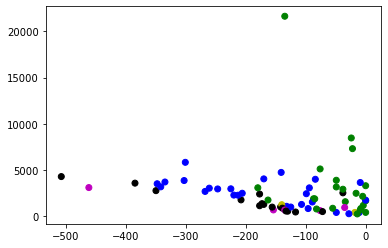

In [32]:
import matplotlib.pyplot as plt
slope_ser = trails_df['descent'] / trails_df['distance'] * -1

# print(slope_ser)

# color_dict = {'green':0x00FE00, 'blue':0x0000FF, 'black':0x0000AA, 'double black':0x000000, 'pro':0xFF0A00}
color_dict = {'green':'g', 'blue':'b', 'black':'k', 'double black':'m', 'pro':'y'}

color_ser = trails_df['rating'].map(color_dict)
plt.scatter(trails_df['descent'], trails_df['distance'], c=color_ser)
plt.show()

### Normalizing Data

In order to use the data to make predictions, we need to normalize the data. Normalizing the data makes it so that the data in each column ranges from 0 to 1, which is important for training because it makes it so that each attribute is weighted equally.

In [5]:
from sklearn.preprocessing import MinMaxScaler

y = trails_df['rating'].copy()
x = trails_df[['distance', 'descent', 'climb']].copy()

scaler = MinMaxScaler()

x = scaler.fit_transform(x[['distance', 'descent', 'climb']])

### Training with a RBF SVM

Here we are training a support vector machine with a radial basis function kernel. The RBF kernel is defined as $K_{RBF}(x, x') = exp[-\lambda||x-x'||^2]$, where $\lambda$ is the spread of the kernel.

We can train an svm on this data using the svm from scikit-learn. We will be testing the accuracy of the classifier by using cross validation. This can be done with `cross_val_score` from scikit-learn.


In [6]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

rbf_svm = svm.SVC(128)

scores = cross_val_score(rbf_svm, x, y, cv=10)

rbf_accuracy = sum(scores) / len(scores)

print(scores)
print("Accuracy: ", rbf_accuracy)

[0.375      0.75       0.5        0.57142857 0.57142857 1.
 0.71428571 0.28571429 0.42857143 0.71428571]
Accuracy:  0.5910714285714286


C:\Users\zach\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass C=128 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\zach\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


### Retrain with a Linear Kernel

Now we will repeat the training with a linear kernel, instead of the default rbf kernel. The linear kernel is defined as $k(x,y)=x^Ty+c$. This is the simplest kernel, and uses linear equations to separate the points. This works best for datasets where the data is naturally separated by a straight line.

In [7]:
linear_svm = svm.SVC(kernel='linear', C=128)

scores = cross_val_score(linear_svm, x, y, cv=10)

linear_accuracy = sum(scores) / len(scores)

print(scores)
print("Accuracy: ", linear_accuracy)

[0.5        0.75       0.625      0.85714286 0.42857143 0.85714286
 0.85714286 0.57142857 0.57142857 0.57142857]
Accuracy:  0.6589285714285713


C:\Users\zach\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


### Retrain with Polynomial Kernel

Next, we will retrain with a polynomial kernel. The polynomial kernel is defined as $k(x,y)=(\alpha x^Ty+c)^d$. This is similar to the linear kernel, except that the equation is raised to the degree of the polynomial. The default of the degree for the scikit-learn implementation is 3.

In [8]:
poly_svm = svm.SVC(kernel='poly', C=128)

scores = cross_val_score(poly_svm, x, y, cv=10)

poly_accuracy = sum(scores) / len(scores)

print(scores)
print("Accuracy: ", poly_accuracy)

C:\Users\zach\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[0.5        0.75       0.625      0.85714286 0.71428571 0.57142857
 0.57142857 0.28571429 0.42857143 0.57142857]
Accuracy:  0.5875


### Retrain with a Sigmoid Kernel

Next, we will retrain with a sigmoid kernel. The sigmoid kernel is defined as $k(x,y)=tanh(\alpha x^Ty+c)$. The sigmoid kernel would be best on a dataset which can be divided easily by a sigmoid function.

In [9]:
sigmoid_svm = svm.SVC(kernel='sigmoid', C=.5)

scores = cross_val_score(sigmoid_svm, x, y, cv=10)

sigmoid_accuracy = sum(scores) / len(scores)

print(scores)
print("Accuracy: ", sigmoid_accuracy)

[0.375      0.375      0.375      0.42857143 0.42857143 0.42857143
 0.28571429 0.28571429 0.28571429 0.42857143]
Accuracy:  0.36964285714285705


C:\Users\zach\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


### Comparing Results

The accuracies of the kernels are displayed below. I also found the accuracy of a stupid predictor which always picks the same rating to compare with the SVMs.

In [10]:
# stupid predictor accuracy
stupid_accuracy = trails_df['rating'].value_counts()[0] / len(trails_df)

accuracy_dict = {"RBF": rbf_accuracy, "linear": linear_accuracy, "polynomial": poly_accuracy, "sigmoid": sigmoid_accuracy, "stupid": stupid_accuracy}
accuracy_df = pd.Series(accuracy_dict)

print(accuracy_df)

RBF           0.591071
linear        0.658929
polynomial    0.587500
sigmoid       0.369643
stupid        0.369863
dtype: float64


The linear kernel was the most accurate. This was surprising to me, because I did not expect the data to be able to be separated easily by a linear equation. This kernel was much more accurate with a high C value. The sigmoid kernel performed the worst, and was actually worse than the stupid predictor, which was just guessing 'blue' every time. This is very surprising, because I would have expected the SVM to just pick one rating if that was able to predict more accurately.